In [1]:
import numpy as np
import scipy as sp
from scipy.io import wavfile
from matplotlib import pyplot as plt
import IPython.display as ipd

In [2]:
def read(filename):
    rate, data = wavfile.read(filename)
    length = data.shape[0] / rate
    time = np.linspace(0, length, data.shape[0], endpoint=False)
    return time, data

def print_info(time, data):
    print(f"time: {time}")
    print(f"data: {data}")
    print(f"rate: {1/(time[1]-time[0])} Hz")
    print(f"duration: {time[-1]+time[1]} s")
    print(f"shape: {data.shape}")
    print(f"dtype: {data.dtype}")
    
def fft(t, signal):
    a = np.fft.fftfreq(len(t)) / (t[1] - t[0])
    b = np.fft.fft(signal)
    return np.fft.fftshift(a), np.fft.fftshift(b)

In [3]:
ipd.Audio("white_noise.wav")

In [ ]:
ipd.Audio("pink_noise.wav")

In [ ]:
ipd.Audio("brownian_noise.wav")

In [ ]:
white_time, white_data = read("white_noise.wav")
pink_time, pink_data = read("pink_noise.wav")
brownian_time, brownian_data = read("brownian_noise.wav")

In [ ]:
print_info(pink_time, pink_data)

In [ ]:
plt.plot(white_time, white_data, label='white')
plt.plot(pink_time, pink_data, label='pink')
plt.plot(brownian_time, brownian_data, label='brownian')
plt.legend();

In [ ]:
plt.plot(white_time[:200], white_data[:200], label='white')
plt.plot(pink_time[:200], pink_data[:200], label='pink')
plt.plot(brownian_time[:200], brownian_data[:200], label='brownian')
plt.legend();

In [ ]:
white_freqs, white_tdata = fft(white_time, white_data)
pink_freqs, pink_tdata = fft(pink_time, pink_data)
brownian_freqs, brownian_tdata = fft(brownian_time, brownian_data)

In [ ]:
plt.plot(white_freqs, np.abs(white_tdata), label='white')
plt.plot(pink_freqs, np.abs(pink_tdata), label='pink')
plt.plot(brownian_freqs, np.abs(brownian_tdata), label='brownian')
plt.legend();

In [ ]:
np.all(white_freqs == pink_freqs)

In [ ]:
np.all(brownian_freqs == pink_freqs)

In [ ]:
sel = np.abs(white_freqs) <  1500
plt.plot(white_freqs[sel], np.abs(white_tdata[sel]), label='white')
plt.plot(pink_freqs[sel], np.abs(pink_tdata[sel]), label='pink')
plt.plot(brownian_freqs[sel], np.abs(brownian_tdata[sel]), label='brownian')
plt.legend();

In [ ]:
sel = white_freqs > 0
plt.loglog(white_freqs[sel], np.abs(white_tdata[sel]), label='white')
plt.loglog(pink_freqs[sel], np.abs(pink_tdata[sel]), label='pink')
plt.loglog(brownian_freqs[sel], np.abs(brownian_tdata[sel]), label='brownian')
plt.legend();

In [ ]:
mitad = len(white_time) // 2

In [ ]:
white_freqs1, white_tdata1 = fft(white_time[:mitad], white_data[:mitad])
pink_freqs1, pink_tdata1 = fft(pink_time[:mitad], pink_data[:mitad])
brownian_freqs1, brownian_tdata1 = fft(brownian_time[:mitad], brownian_data[:mitad])

In [ ]:
white_freqs2, white_tdata2 = fft(white_time[mitad:], white_data[mitad:])
pink_freqs2, pink_tdata2 = fft(pink_time[mitad:], pink_data[mitad:])
brownian_freqs2, brownian_tdata2 = fft(brownian_time[mitad:], brownian_data[mitad:])

In [ ]:
print(np.min(np.abs(white_freqs[white_freqs!=0])))
print(np.min(np.abs(white_freqs1[white_freqs1!=0])))

In [ ]:
print(np.max(np.abs(white_freqs)))
print(np.max(np.abs(white_freqs1)))

In [ ]:
sel = white_freqs > 10
sel1 = white_freqs1 > 10

plt.loglog(white_freqs[sel], np.abs(white_tdata[sel]), label='white')
plt.loglog(white_freqs1[sel1], np.abs(white_tdata1[sel1]), label='white1')
plt.loglog(white_freqs2[sel1], np.abs(white_tdata2[sel1]), label='white2')
plt.legend();

In [ ]:
from scipy.ndimage.filters import uniform_filter1d

def smooth_abs(data):
    return uniform_filter1d(np.abs(data), size=501)

In [ ]:
plt.loglog(white_freqs[sel], smooth_abs(white_tdata[sel]), label='white')
plt.loglog(white_freqs1[sel1], smooth_abs(white_tdata1[sel1]), label='white1')
plt.loglog(white_freqs2[sel1], smooth_abs(white_tdata2[sel1]), label='white2')
plt.legend();

Para hacer
----------

1. Hacer un programa para generar ruido de distintos "colores".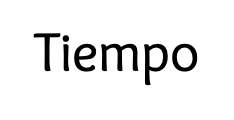